In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
class orbit:
    
    def __init__(self,fxn):
        
        self.r0 = None #Initial position and velocities
        
        self.rf = np.zeros(2) #Final numerically calculated position
        self.r_exact = np.zeros(2) #Final analytical position
        
        self.t = None #Time variable
        self.tf = None #Final time
        
        self.ts = None #Matrix of all times
        self.rs = None #Matrix of all positions and velocities at all times
        
        self.scheme = None #scheme of evolution
        self.fxn = fxn #Function for evolution - Newtonian OR Relativistic
        
        self.h = None #time step, can be varied
        self.N = 0 #Number of steps
        
        #Constants for the specific case at hand
        
        self.G = 6.674 * 10**(-11) #Gravitational Constant 
        
        self.L=None #Length Scale ~ semimajor axis
        self.M=None #Mass Scale ~ mass of object
        self.T=None #Time Scale
        self.V=None #Velocity Scale
        self.ecc=None #Eccentricity of orbit
    
    def setorbit(self, m, a, ecc): # m = Mass of central object, a = semimajor axis, ecc = eccentricity 
        
        self.ecc = ecc
        
        #Length scale = semi-major axis
        self.L = a 
        #Setting the time and velocity scales
        self.T = np.sqrt((self.L**3/(self.G*m)))
        self.V = self.L/self.T
        
        #All things below are in the new scale! 
        ap = (1+self.ecc)
        peri = (1-self.ecc)
        x0 = ap
        y0 = 0
        vx0 = 0
        vy0 = np.sqrt(2/(1+self.ecc) - 1)
        self.r0 = np.array([x0, y0, vx0, vy0])
    
    
    #For methods feuler, rk2
    def evolve(self, scheme, t0, tf, N):
        self.N = N
        self.scheme = scheme
        self.rs = np.zeros([4,N+1])
        self.rs[:,0]=self.r0
        self.ts = np.zeros(N+1)
        h = (tf-t0)/N
        self.t = t0
        self.ts[0] = self.t
        
        for i in range(N):
            self.rs[:,(i+1)] = self.scheme(self.rs[:,i], h, self.fxn)
            self.t += h
            self.ts[i+1] = self.t

        return self.rs[0], self.rs[1]

In [3]:
#Newtonian Potential first derivative of positions and velocities#

def fxn(r):
    x=r[0]
    y=r[1]
    vx=r[2]
    vy=r[3]
    k=-1
    return np.array([vx, vy, k*x/((x**2 + y**2)**(3/2)), k*y/((x**2 + y**2)**(3/2))])  


#Forward euler for evolving the vector containing positions and velocities for one time step#
def feuler(r, dt, fxn):
    return r + fxn(r)*dt

#rk2 for evolving the vector containing positions and velocities for one time step#
def rk2(r, dt, f):
    k1 = dt * f(r)
    k2 = dt * f(r+k1/2)
    r_new = r + k2
    return r_new

Text(0, -0.2, 'S')

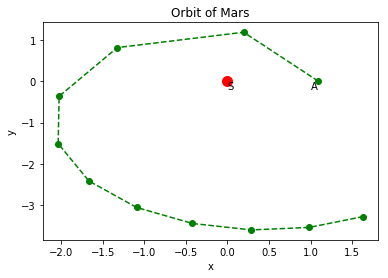

In [7]:
a = 228*10**9
ecc = 0.0934
m = 1.99847*10**30
ti=0
tf = 5*2*np.pi *(365/687)
mars = orbit(fxn)
mars.setorbit(m,a,ecc)

N = 100

#TO GET PLOT OF MARS ORBIT USING FEULER/RK2 #
mars.evolve(feuler,ti,tf,N)
plt.plot(mars.rs[0,::10],mars.rs[1,::10],'go--')
plt.plot(0,0,'ro',markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Orbit of Mars")
plt.text(1,-0.2,"A")
plt.text(0,-0.2,"S")